In [1]:
from neuron.mnist import mnist_loader
import neuron.mnist.network_standard as network
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns

from neuron.activation_functions import sigmoid
from neuron.mnist import stepik_original as stepik

np.set_printoptions(precision=5)

% load_ext autoreload
% autoreload 2

### The networks are fully reconciled. With full data set you may even use different mnist parser. The final weights should be reconciled

# PARSE DATA

In [2]:
import os
os.chdir("C:\\Users\\mkapchenko\\Dropbox\\perso\\GitHub\\Neuron\\notebooks")
training_data, validation_data, test_data =  mnist_loader.load_data_wrapper()

n = 50000
nepochs = 30
nb_batches = 10
batch_size = 784//nb_batches 

mini_res = list(training_data)[0:n]
mini_test = list(test_data)[0:n]

# to have the same data
minX = np.array(mini_res[0][0])
miny = np.array(mini_res[0][1])

In [3]:
%time 
for example in range(1, len(mini_res)):
    minX = np.concatenate((minX, mini_res[example][0]), axis=1)
    miny = np.concatenate((miny, mini_res[example][1]), axis=1)
    
minX, miny = minX.T, miny.T

Wall time: 0 ns


KeyboardInterrupt: 

In [10]:
(X, y), (validation_X, validation_y), (test_X, test_y) =  mnist_loader.perf_load_data_wrapper()

# LEARNING
### Neuron

In [11]:
%%time
# 28 s
# minX, miny = X[0:n], y[0:n]
netw = network.Network([784, 30, 10])

netw.SGD(X, y, epochs=nepochs, batch_size=batch_size, learning_rate = 3.);

Epoch 0 done.
Epoch 1 done.
Epoch 2 done.
Epoch 3 done.
Epoch 4 done.
Epoch 5 done.
Epoch 6 done.
Epoch 7 done.
Epoch 8 done.
Epoch 9 done.
Epoch 10 done.
Epoch 11 done.
Epoch 12 done.
Epoch 13 done.
Epoch 14 done.
Epoch 15 done.
Epoch 16 done.
Epoch 17 done.
Epoch 18 done.
Epoch 19 done.
Epoch 20 done.
Epoch 21 done.
Epoch 22 done.
Epoch 23 done.
Epoch 24 done.
Epoch 25 done.
Epoch 26 done.
Epoch 27 done.
Epoch 28 done.
Epoch 29 done.
Wall time: 28 s


### Stepik

In [12]:
%%time
# 9min 9s
# Stepik network
netstepik = stepik.Network([784, 30, 10])
netstepik.SGD(mini_res, epochs=nepochs, mini_batch_size=batch_size, eta=3.0, test_data=mini_test)

Epoch 0: 6859 over 10000
Epoch 1: 8359 over 10000
Epoch 2: 8827 over 10000
Epoch 3: 8944 over 10000
Epoch 4: 9032 over 10000
Epoch 5: 9097 over 10000
Epoch 6: 9120 over 10000
Epoch 7: 9140 over 10000
Epoch 8: 9169 over 10000
Epoch 9: 9185 over 10000
Epoch 10: 9197 over 10000
Epoch 11: 9214 over 10000
Epoch 12: 9223 over 10000
Epoch 13: 9229 over 10000
Epoch 14: 9243 over 10000
Epoch 15: 9255 over 10000
Epoch 16: 9260 over 10000
Epoch 17: 9269 over 10000
Epoch 18: 9279 over 10000
Epoch 19: 9284 over 10000
Epoch 20: 9293 over 10000
Epoch 21: 9300 over 10000
Epoch 22: 9308 over 10000
Epoch 23: 9313 over 10000
Epoch 24: 9319 over 10000
Epoch 25: 9321 over 10000
Epoch 26: 9333 over 10000
Epoch 27: 9335 over 10000
Epoch 28: 9341 over 10000
Epoch 29: 9346 over 10000
Wall time: 9min 25s


# RECON

### Final weights

In [13]:
for layer in range(2):
    print(f'Layer {layer} recon: ' , (netstepik.weights[layer] - netw.weights[layer]).mean())

Layer 0 recon:  7.515368393847606e-18
Layer 1 recon:  4.463385679572459e-16


### Gradient by epoch
Should be reconciled if the mnist data is in the same order for two networks

In [8]:
for epoch in range(nepochs):
    print(f'           *** epoch = {epoch} ***')
    print('Intercept gradient last layer ', (netstepik.nabla_b[epoch][1] * 1/n - netw.debug_djdb_by_batch[epoch][1]).mean())
    print('Intercept gradient first layer', (netstepik.nabla_b[epoch][0] * 1/n - netw.debug_djdb_by_batch[epoch][0]).mean())
    print('Weights gradient last layer   ', (netstepik.nabla_w[epoch][1] * 1/n - netw.debug_djdw_by_batch[epoch][1]).mean())
    print('Weights gradient first layer  ', (netstepik.nabla_w[epoch][0] * 1/n - netw.debug_djdw_by_batch[epoch][0]).mean())
    print('')

           *** epoch = 0 ***
Intercept gradient last layer  -0.04613564866013714
Intercept gradient first layer 0.0007246531170337439
Weights gradient last layer    -0.02423135413632399
Weights gradient first layer   6.191611809778476e-05

           *** epoch = 1 ***
Intercept gradient last layer  -0.02783219426824715
Intercept gradient first layer 0.0014026452530399873
Weights gradient last layer    -0.014375282057020015
Weights gradient first layer   0.00019702110213658773

           *** epoch = 2 ***
Intercept gradient last layer  -0.010965939841894794
Intercept gradient first layer 0.0007923584252321453
Weights gradient last layer    -0.005957991075160698
Weights gradient first layer   0.00011584747251448123

           *** epoch = 3 ***
Intercept gradient last layer  -0.008162715641443104
Intercept gradient first layer 0.0004884620156867803
Weights gradient last layer    -0.0042965926109501595
Weights gradient first layer   6.411502353870791e-05

           *** epoch = 4 ***
Int

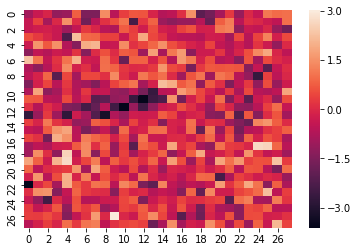

In [21]:
sns.heatmap(netw.weights[0][27].reshape(28,28))